# Assignment 3

## Problem 1 [20 Points]

Consider a Bayesian model with parameters $\theta$ for which you want to maximize its marginal log-likelihood $\log p(\mathcal{D})$ given some observed data $\mathcal{D}$. As this objective is generally intractable, assume a variational approximation to
the posterior by introducing an auxiliary distribution $q(\theta\lvert\mathcal{D})$.

(1) Please derive the following inequality
:
$\log p(\mathcal{D}) \geq \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D}) $


(2) Show that the above inequality becomes an equality when the KL divergence between the true posterior and your variational posterior becomes 0, i.e.

$$\mathbb{KL}[q(\theta\lvert\mathcal{D})||p(\theta\lvert \mathcal{D})] = 0$$

(3) One way to design a more flexible variational approximation beyond the mean-field familty is by considering an invertible transformation $f_{\phi}: \mathcal{Z} \to \mathcal{\Theta}$, where $\phi$ denotes the parameters of the invertible transformation.Using the change of variables formula, we can obtain a variational approximation $q_{\phi}(\theta | \mathcal{D})$ that is easy to sample from and easy to evaluate as

\begin{align}
    \theta &= f(z), \quad \text{with}\; z \sim p_z(z), \\
    q_{\phi} (\theta | \mathcal{D}) &= p_z(f_{\phi}^{-1}(\theta)) | \mathrm{det} \nabla_\theta (f_{\phi}^{-1} (\theta))|.
\end{align}

Derive a tractable optimization objective for identifying the optimal parameters $\phi$ via gradient-based optimization assuming that $p_z = \mathcal{N}(0, I)$.

## ANSWER 1.1
Consider a Bayesian model with parameters $\theta$ for which you want to maximize its marginal log-likelihood $\log p(D)$ given some observed data $D$. As this objective is generally intractable, assume a variational approximation to the posterior by introducing an auxiliary distribution $q(\theta|D)$.

The goal of variational inference is to optimize the variational distribution $q(\theta|D)$ with respect to its parameters in order to approximate the true posterior $p(\theta|D)$ as closely as possible. To this end, we use the evidence lower bound (ELBO) as an objective function, which is a lower bound for the marginal log-likelihood:

\begin{aligned}
\log p(D) &= \mathbb{E}{q(\theta|D)}[\log p(D)] \\
&= \mathbb{E}{q(\theta|D)}[\log p(D|\theta) + \log p(\theta) - \log q(\theta|D)] + \text{KL}[q(\theta|D) || p(\theta|D)] \\
&\geq \mathbb{E}_{q(\theta|D)}[\log p(D|\theta) + \log p(\theta) - \log q(\theta|D)]
\end{aligned}

The derivation of this inequality is based on the definition of the KL divergence between the true posterior $p(\theta|D)$ and the variational posterior $q(\theta|D)$:

\begin{aligned}
\text{KL}[q(\theta|D) || p(\theta|D)] &= \mathbb{E}{q(\theta|D)}[\log q(\theta|D) - \log p(\theta|D)] \\
&= \mathbb{E}{q(\theta|D)}[\log q(\theta|D) - \log p(D,\theta) + \log p(D)] \\
&= -\mathbb{E}_{q(\theta|D)}[\log p(D|\theta) + \log p(\theta) - \log q(\theta|D)] + \log p(D)
\end{aligned}

By rearranging the terms in the first inequality and using the non-negativity of the KL divergence, we obtain the desired result. The ELBO can be optimized using gradient-based methods, such as stochastic gradient descent, to find the optimal parameters of the variational distribution.

##ANSWER 1.2
To show that the above inequality becomes an equality when $\text{KL}[q(\theta|D)||p(\theta|D)] = 0$, we note that the KL divergence between two distributions is always non-negative, and is equal to zero if and only if the two distributions are identical. Therefore, if $\text{KL}[q(\theta|D)||p(\theta|D)] = 0$, then we must have $q(\theta|D) = p(\theta|D)$, and hence:

\begin{align*}
\log p(D) &= \mathbb{E}{q(\theta|D)}[\log p(D|\theta) + \log p(\theta) - \log p(\theta|D)] \\
&= \mathbb{E}{q(\theta|D)}[\log p(D|\theta) + \log \frac{p(\theta)}{p(\theta|D)}] \\
&= \mathbb{E}_{q(\theta|D)}[\log p(D|\theta) + \log p(\theta) - \log q(\theta|D)] \\
&= \log \int q(\theta|D) \frac{p(D|\theta)p(\theta)}{q(\theta|D)} d\theta \\
&= \log p(D)
\end{align*}

Therefore, the inequality becomes an equality when $\text{KL}[q(\theta|D)||p(\theta|D)] = 0$.

##ANSWER 1.3:
One way to design a more flexible variational approximation beyond the mean-field family is by considering an invertible transformation $f_\phi:Z\rightarrow\Theta$, where $\phi$ denotes the parameters of the invertible transformation. 


Using the change of variables formula, we can obtain a variational approximation $q_\phi(\theta|D)$ that is easy to sample from and easy to evaluate as:

\begin{equation*}
\theta_{q_\phi}(\theta|D)=f(z), \quad \text{with } z\sim p_z(z), \quad p_z=N(0,I)
\end{equation*}

\begin{equation*}
=q_z(f^{-1}\phi(\theta))\left|\det\left(\frac{\partial f^{-1}\phi(\theta)}{\partial\theta}\right)\right|.
\end{equation*}

The optimization objective for identifying the optimal parameters $\phi$ via gradient-based optimization can be derived as follows:

First, we note that the variational lower bound can be expressed as:

\begin{equation*}
L(\phi)=\mathbb{E}{q\phi(\theta|D)}[\log p(D,\theta)-\log q_\phi(\theta|D)]
\end{equation*}

Using the change of variables formula, we can write:

\begin{equation*}
L(\phi)=\mathbb{E}{p_z(z)}[\log p(D,f\phi(z))-\log \left|\det\left(\frac{\partial f^{-1}_\phi(\theta)}{\partial\theta}\right)\right|-\log p_z(z)]
\end{equation*}

<!-- Assuming that the likelihood function $p(D|\theta)$ is tractable, we can evaluate the first term. The second term, $\log p(f_\phi(z))$, can be evaluated if we assume a prior distribution on the parameters $\phi$.

Finally, we can write the gradient of the lower bound with respect to the parameters $\phi$ as:

\begin{equation*}
\nabla_\phi L(\phi)=\mathbb{E}{p_z(z)}\left[\left(\nabla\theta\log p(D|f_\phi(z))\right)\nabla_\phi f_\phi(z)+\nabla_\phi\log p(f_\phi(z))\right]
\end{equation*}

This gradient can be estimated using Monte Carlo samples from $p_z(z)$ and the chain rule to propagate gradients through the inverse transformation $f^{-1}_\phi(\theta)$. We can then optimize the parameters $\phi$ using gradient ascent. -->

Since $\log p_z(z)$ is a normal distrubution with unit covariance the entropy of normal distribution is constant.
\begin{equation*}
L(\phi)=\mathbb{E}{p_z(z)}[\log p(D,f\phi(z))-\log \left|\det\left(\frac{\partial f^{-1}_\phi(\theta)}{\partial\theta}\right)\right|
\end{equation*}

## Problem 2 [40 Points]

Recall HW2 Question 2, where you derived the conditional distribution of a Bayesian regression model with a likelihood $p(y\lvert x, \alpha, \beta, \gamma)$ corresponding to a linear observation model is $y = \alpha x + \beta + \epsilon$. Noting that $\gamma$ represents the noise level in the observed data, i.e. it corresponds to the precision of the data likelihood. In this case, the likelihood can be further expressed as:

$p(y\lvert x, \alpha, \beta, \gamma) = (\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})$

while the conditional posteriors are:

$p(\alpha\lvert x, y, \beta, \gamma) = \mathcal{N}(\mu_1,\frac{1}{\lambda_1})$, where $\mu_1 = \frac{\gamma \sum_{i=1}^{n}x_i(y_i-\beta)}{1+\gamma \sum_{i=1}^{n}x_i^2}$ and $\lambda_1 = 1+\gamma \sum_{i=1}^{n}x_i^2$

$p(\beta\lvert x, y, \alpha, \gamma) = \mathcal{N}(\mu_2,\frac{1}{\lambda_2})$ where $\mu_2 = \frac{\gamma \sum_{i=1}^{n}(y_i-x_i\alpha)}{n\gamma+1}$ and $\lambda_2 = n\gamma+1$

$p(\gamma\lvert x, y, \alpha, \beta) =  \text{Gam}(a,b)$ where $a=\frac{n}{2}+2$ and $b = \frac{1}{2}[2+\sum_{i=1}^{n}(y_i-x_i\alpha-\beta)^2]$

Generate your training data by considering true parameters $\alpha, \beta, \gamma = 1.5, -3, 1$. Considering a uniform distribution, randomly sample $x$ in $[0, 3]$ using $N = 200$

(1) Implement the Gibbs sampling algorithms using the above conditional posteriors to generate $5,000$ samples from the target posterior distribution $p(\alpha,\beta,\gamma\lvert x, y)$. Discard the first 2,000 as a burn-in phase and plot a histogram generated from your samples. Also, please draw some samples of linear lines using $50$ samples you got.

(2) Gibbs sampling depends on deriving an analytical expression of the corresponding conditional posterior distributions. However, this cannot be done in many applications. Assume that you only have access to the unnormalized posterior, using the likelihood listed above and prior distributions: $p(\alpha) = \mathcal{N}(0, 1)$, $p(\beta) = \mathcal{N}(0, 1)$ and $p(\gamma) = \textrm{Gam(2, 1)}$. Implement the Metropolis algorithm to sample $5,000$ samples from the target posterior distribution $p(\alpha,\beta,\gamma\lvert x, y)$.  Discard the first 2,000 as a burn-in phase and plot a histogram generated from your samples. Please compare these histograms with the plots from Gibbs sampling. Also, please draw some samples of linear lines using $50$ samples you got.

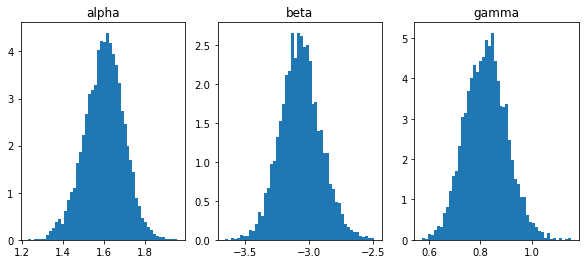

In [ ]:
import jax.numpy as jnp
from jax import random
from jax.scipy.stats import norm, gamma
from jax.scipy.stats import gamma as gamma_dist

def gibbs_sampler(x, y, n_samples, burn_in):
    # Initialize variables
    alpha = 1.5
    beta = -3.0
    gamma = 1.0
    n = len(x)
    X=0
    
    # Create empty lists to store posterior samples
    alpha_samples = []
    beta_samples = []
    gamma_samples = []
    X=0
    # Run Gibbs sampler
    for i in range(n_samples + burn_in):
        X=X+1
        key=random.PRNGKey(X)
        keys=random.split(key,3)
        key1,key2,key3=keys
        
        # Sample alpha
        mu_alpha = gamma * jnp.sum(x*(y - beta))/(1 + gamma*jnp.sum(x**2))
        lambda_alpha = 1 + gamma*jnp.sum(x**2)
        alpha = random.normal(key1) * jnp.sqrt(1/lambda_alpha) + mu_alpha
        
        # Sample beta
        mu_beta = gamma*jnp.sum(y - alpha*x)/(n*gamma + 1)
        lambda_beta = n*gamma + 1
        beta = random.normal(key2) * jnp.sqrt(1/lambda_beta) + mu_beta
        
        # Sample gamma
        a_gamma = n/2 + 2
        b_gamma = 1/2*(2 + jnp.sum((y - alpha*x - beta)**2))
        gamma = random.gamma(key3, a_gamma)/b_gamma
        alpha_samples.append(alpha)
        beta_samples.append(beta)
        gamma_samples.append(gamma)
    
    return alpha_samples[2000:], beta_samples[2000:], gamma_samples[2000:]

from jax import random
import jax.numpy as jnp
from jax import random

# Define true parameters
alpha_true = 1.5
beta_true = -3.0
gamma_true = 1.0

# Generate data
key = random.PRNGKey(0)
keys=random.split(key,2)
x = random.uniform(keys[0], shape=(200,), minval=0.0, maxval=3.0)
y = alpha_true * x + beta_true + random.normal(keys[1], shape=(200,)) / jnp.sqrt(gamma_true)


# Run Gibbs sampler
alpha_samples, beta_samples, gamma_samples = gibbs_sampler(x, y, n_samples=5000, burn_in=2000)

# Plot histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.hist(alpha_samples, bins=50, density=True)
plt.title('alpha')

plt.subplot(1, 3, 2)
plt.hist(beta_samples, bins=50, density=True)
plt.title('beta')

plt.subplot(1, 3, 3)
plt.hist(gamma_samples, bins=50, density=True)
plt.title('gamma')

plt.show()


In [ ]:
samples=jnp.array([alpha_samples,beta_samples,gamma_samples])
print(jnp.shape(samples))

(3, 5000)


In [ ]:

from jax import jit, vmap
from jax.lax import scan, cond
from functools import partial

@jit
def predictive_posterior(samples, batch):
    alpha,beta,gamma=samples
    outputs = alpha*batch+beta
    return outputs

num_traj = 50

traj_1 = vmap(predictive_posterior, in_axes=(1,None))(samples[:,-num_traj:], x)

Text(0, 0.5, '$y(t)$')

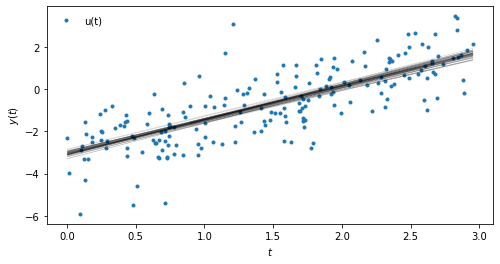

In [ ]:
# Plot the referenceand predicted trajectories
plt.figure(figsize = (8,4))
plt.plot(x, y, '.', label='u(t)')

for i in range(num_traj):
    plt.plot(x, traj_1[i-num_traj,:],'k', lw=0.5, alpha=0.1)
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

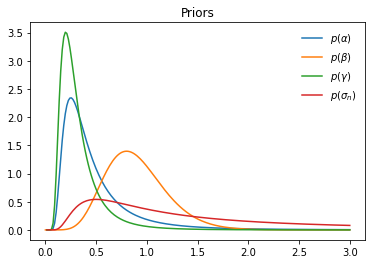

In [ ]:
from jax.lax import lgamma

# https://en.wikipedia.org/wiki/Normal_distribution
def norm_logpdf(x, loc=0.0, scale=1.0):
    return -jnp.log(scale) - 0.5*jnp.log(2.0*jnp.pi)-0.5*(x-loc)**2/scale**2

# https://en.wikipedia.org/wiki/Gamma_distribution
def gamma_logpdf(x, shape=0.0, scale=1.0):
    return (shape-1.0)*jnp.log(x) - x/scale - lgamma(shape) - shape*jnp.log(scale)

# https://en.wikipedia.org/wiki/Inverse-gamma_distribution
def invgamma_logpdf(x, shape=0.0, scale=1.0):
    return shape*jnp.log(scale) - (shape+1.0)*jnp.log(x) - scale/x - lgamma(shape)

# Plot priors
xx = jnp.linspace(0, 3, 200)
plt.plot(xx, jnp.exp(invgamma_logpdf(xx, 3.0, 1.0)), label=r'$p(\alpha)$')
plt.plot(xx, jnp.exp(gamma_logpdf(xx, 9.0, 0.1)), label=r'$p(\beta)$')
plt.plot(xx, jnp.exp(invgamma_logpdf(xx, 4.0, 1.0)), label=r'$p(\gamma)$')
plt.plot(xx, jnp.exp(invgamma_logpdf(xx, 1.0, 1.0)), label=r'$p(\sigma_n)$')
plt.title('Priors')
plt.legend(frameon=False)

In [ ]:
def log_posterior(params, batch):
    alpha, beta, gamma= params
    inputs, targets = batch
    # Log-likelihood
    outputs = inputs*alpha+beta
    log_likelihood = jnp.sum(norm_logpdf(targets, loc=outputs, scale=jnp.sqrt(1/gamma)))
    # Log-prior
    log_prior = norm_logpdf(alpha, loc=0.0, scale=1.0) + \
                norm_logpdf(beta, loc=0.0, scale=1.0) + \
                gamma_logpdf(gamma, shape=2.0, scale=1.0) 
    return log_likelihood + log_prior

In [ ]:
from jax import jit, vmap
from jax.lax import scan, cond
from functools import partial

def metropolis(log_prob, sigma):
    def init(rng_key, bounds):
        lb, ub = bounds
        dim = lb.shape[0]
        x0 = random.uniform(rng_key, (dim,), minval=lb, maxval=ub)
        return x0
    @partial(jit, static_argnums=(0,))
    def sample(num_samples, rng_key, init_state):
        def kernel(carry, i):
            key, state, logp = carry
            key, subkey = random.split(key)
            x = state + sigma * random.normal(subkey, state.shape)
            logp_prop = log_prob(x)
            u = random.uniform(key)
            cond = (u < jnp.exp(logp_prop - logp))
            state = jnp.where(cond, x, state)
            logp = jnp.where(cond, logp_prop, logp)
            return (key, state, logp), state
        logp = log_prob(init_state)
        _, samples = scan(kernel, (rng_key, init_state, logp), jnp.arange(num_samples))
        return samples
    return init, sample

In [ ]:
inputs = x
targets = y
batch = inputs, targets

# [[1.0,-3.4,2.0], [1.8, -2.5, 0.0]]

log_prob = lambda params: log_posterior(params, batch)

step_size = 0.005
init_fn, sample_fn = metropolis(log_prob, step_size)

num_chains = 2
burn_in = 2000
num_steps = 50000
key = random.PRNGKey(0)
keys = random.split(key, num_chains)
init_states = jnp.array([[0.9,-3.3,1.9], [1.6, -2.3, 0.0]])
samples = vmap(sample_fn, in_axes=(None, 0, 0))(num_steps, keys, init_states)

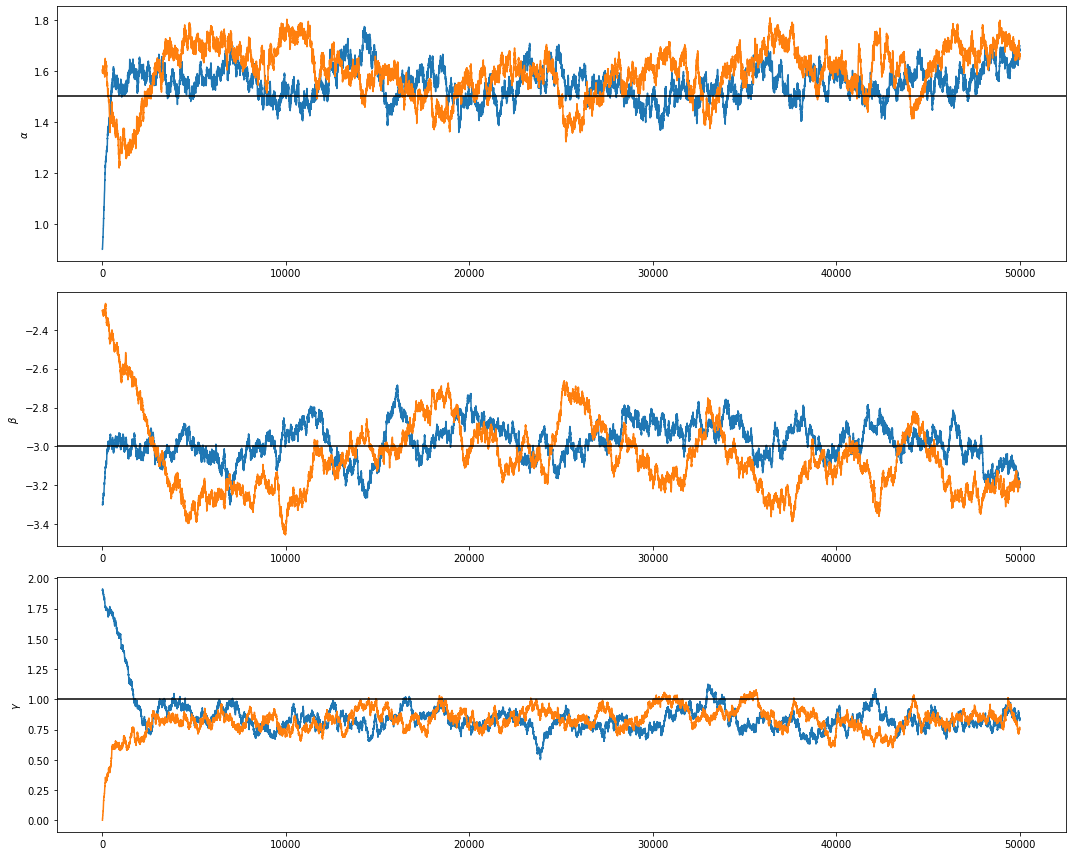

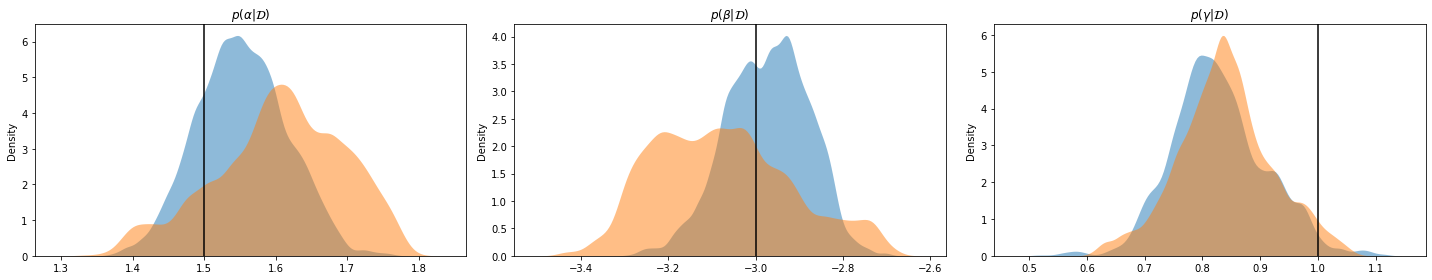

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
for i in range(num_chains):
    plt.plot(samples[i,:,0])
plt.axhline(alpha_true, color='black')
plt.ylabel(r'$\alpha$')
plt.subplot(3,1,2)
for i in range(num_chains):
    plt.plot(samples[i,:,1])
plt.axhline(beta_true, color='black')
plt.ylabel(r'$\beta$')
plt.subplot(3,1,3)
for i in range(num_chains):
    plt.plot(samples[i,:,2])
plt.axhline(gamma_true, color='black')
plt.ylabel(r'$\gamma$')
plt.tight_layout()



plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
for i in range(num_chains):
    sns.kdeplot(samples[i,burn_in:,0], fill=True, alpha=.5, linewidth=0)
plt.axvline(alpha_true, color='k')
plt.title(r'$p(\alpha|\mathcal{D})$')
plt.subplot(1,3,2)
for i in range(num_chains):
    sns.kdeplot(samples[i,burn_in:,1], fill=True, alpha=.5, linewidth=0)
plt.axvline(beta_true, color='k')
plt.title(r'$p(\beta|\mathcal{D})$')
plt.subplot(1,3,3)
for i in range(num_chains):
    sns.kdeplot(samples[i,burn_in:,2], fill=True, alpha=.5, linewidth=0)
plt.axvline(gamma_true, color='k')
plt.title(r'$p(\gamma|\mathcal{D})$')
plt.tight_layout()

Text(0, 0.5, '$y(t)$')

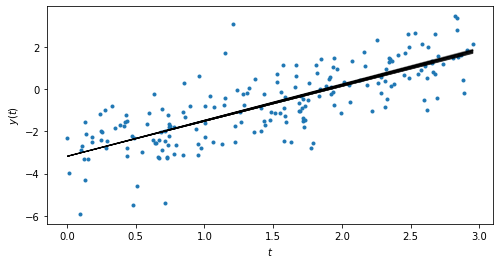

In [ ]:
from jax import vmap

num_traj = 50
chain_1 = samples[0,...]
chain_2 = samples[1,...]
traj_1 = vmap(predictive_posterior, in_axes=(0,None))(chain_1[-num_traj:,:], x)
traj_2 = vmap(predictive_posterior, in_axes=(0,None))(chain_2[-num_traj:,:], x)

# Plot the referenceand predicted trajectories
plt.figure(figsize = (8,4))
plt.plot(x, y, '.')

for i in range(num_traj):
    plt.plot(x, traj_1[i-num_traj,:],'k', lw=0.5, alpha=0.1)
    plt.plot(x, traj_2[i-num_traj,:],'k', lw=0.5, alpha=0.1)
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

# Problem 3 [20 Points]

(1) The Fisher Information Matrix is defined as:
$F = \mathbb{E}_{p(x\lvert \theta)}[\nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T]$
Prove that negative expected Hessian of log-likelihood is equal to the Fisher Information Matrix $F$.

(2) Prove that Fisher Information Matrix F is the Hessian of KL-divergence between two distributions $p(x\lvert \theta)$ and $p(x\lvert \theta')$ with respect to $\theta'$ evaluated at $\theta' = \theta$.

## ANSWER 3.1

The Hessian Matrix is a square matrix of second-order partial derivatives of a scalar-valued function, which describe the local curvature. The Hessian matrix of the log-likelihood can be written as:

$$H_{\mathrm{log}\ p(x|\theta)} = J(\nabla_\theta \mathrm{log}\ p(x|\theta)) = J\left(\frac{\nabla_\theta p(x|\theta)}{p(x|\theta)}\right)$$
$$= \frac{1}{p(x|\theta)}H_{p(x|\theta)} - \frac{\nabla_\theta p(x|\theta)\nabla_\theta p(x|\theta)^T}{p(x|\theta)^2}$$

Now, let's take the expectation w.r.t. the current model $p(x|\theta)$:

$$\mathbb{E}{p(x|\theta)}[H{\mathrm{log}\ p(x|\theta)}] = \mathbb{E}{p(x|\theta)}\left[\frac{1}{p(x|\theta)}H{p(x|\theta)} - \frac{\nabla_\theta p(x|\theta)\nabla_\theta p(x|\theta)^T}{p(x|\theta)^2}\right]$$\
$$= \int_x \frac{1}{p(x|\theta)}H_{p(x|\theta)}p(x|\theta)dx - \mathbb{E}{p(x|\theta)}\left[\frac{\nabla\theta p(x|\theta)\nabla_\theta p(x|\theta)^T}{p(x|\theta)^2}\right]$$\
$$= H_{p(x|\theta)} - \mathbb{E}{p(x|\theta)}\left[\nabla\theta \mathrm{log}\ p(x|\theta) \nabla_\theta \mathrm{log}\ p(x|\theta)^T\right]$$\
$$= -I_\theta$$

The negative expected Hessian of log-likelihood is equal to the Fisher Information Matrix  F .









## ANSWER 3.2
Let $p(x|\theta)$ and $p(x|\theta')$ be two distributions, where $\theta'$ is very close to $\theta$ and we are interested in the local curvature. The Kullback-Leibler (KL) divergence between them can be expressed as:

\begin{align}
KL[p(x|\theta)||p(x|\theta')] &= \mathbb{E}{p(x|\theta)}[\log p(x|\theta)] - \mathbb{E}{p(x|\theta)}[\log p(x|\theta')] \
\end{align}

Taking the first derivative with respect to $\theta'$, we get:

\begin{align}
\nabla_{\theta'} KL[p(x|\theta)||p(x|\theta')] &= \nabla_{\theta'} \mathbb{E}{p(x|\theta)}[\log p(x|\theta)] - \nabla{\theta'} \mathbb{E}{p(x|\theta)}[\log p(x|\theta')] \
&= -\mathbb{E}{p(x|\theta)}[\nabla_{\theta'} \log p(x|\theta')] \
&= -\int_x p(x|\theta) \nabla_{\theta'} \log p(x|\theta') dx \
\end{align}

In the next step, we take the second derivative with respect to $\theta'$:

\begin{align}
\nabla_{\theta'}^2 KL[p(x|\theta)||p(x|\theta')] &= -\int_x p(x|\theta) \nabla_{\theta'}^2 \log p(x|\theta') dx \
&= -\int_x p(x|\theta) \frac{\nabla_{\theta'}^2 p(x|\theta')}{p(x|\theta')} dx \
\end{align}

Evaluating the Hessian at $\theta'=\theta$, we get:

\begin{align}
H_{KL}[p(x|\theta)||p(x|\theta')] &= \nabla_{\theta'}^2 KL[p(x|\theta)||p(x|\theta')] \
&= -\int_x p(x|\theta) \nabla_{\theta'}^2 \log p(x|\theta') |{\theta'=\theta} dx \
&= -\int_x p(x|\theta) \nabla{\theta}^2 \log p(x|\theta) dx \
&= -\mathbb{E}_{p(x|\theta)}[H[\log p(x|\theta)]] \
&= I(\theta) \
\end{align}

where $H[\cdot]$ denotes the Hessian matrix. Thus, the Hessian of KL divergence between two distributions evaluated at $\theta'=\theta$ is equal to the Fisher information matrix of the distribution $p(x|\theta)$ at $\theta$.












# Problem 4 [20 Points]

Consider the evolution of the Lotka-Volterra model (also called Predator-Prey equations) that describes the dynamics of two species $u$ and $v$ in a closed system. The dynamics of the system is governed by the following equations:

\begin{align}
    \frac{du}{dt} &= \alpha u - \beta u v, \\
    \frac{dv}{dt} &= \delta u v - \gamma v,
\end{align}

where, $u$ is the number of prey (for example, rabbits), $v$ is the number of predators (for example, foxes). The parameters $\alpha, \beta, \gamma, \delta$ are positive constants that describe the interaction between the two species. 
- $\alpha$ is the growth rate of the prey population when there are no predators.
- $\beta$ is the rate at which predators kill prey.
- $\gamma$ is the rate at which predators die.
- $\delta$ is the rate at which predators reproduce.

(1) Numerically integrate this system for choice of initial conditions $u(0) = 10, v(0) = 5$ and $\alpha = 1, \beta = 0.1, \gamma = 1.5, \delta = 0.75$. Plot the trajectories of $u$ and $v$ over a time of 15 days using 100 timesteps.

(2) Perturb the numerically integrated data with Gaussian noise having 10% standard deviation of the clean data. Utilizing this data, infer the underlying parameters for the model utilizing [MALA](https://en.wikipedia.org/wiki/Metropolis-adjusted_Langevin_algorithm). Plot the posterior distributions for the inferred parameters. Consider the following priors for your model:
\begin{align}
    p(\alpha) &= \mathrm{Gamma}(9, 0.1), \\
    p(\beta) &= \mathrm{Gamma}(2, 0.05), \\
    p(\gamma) &= \mathrm{Gamma}(2, 1), \\
    p(\delta) &= \mathrm{Gamma}(1, 1), \\
    p(\sigma_n) &= \mathrm{InvGamma}(1, 2)
\end{align}

In [ ]:
import jax.numpy as np
from jax import random
from jax.experimental.ode import odeint
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth']=3

In [ ]:
def model(x, t, alpha, beta, gamma, delta):
    u,v = x
    f1 = alpha*u-beta*u*v
    f2 = delta*u*v-gamma*v
    dxdt=[f1,f2]
    return dxdt

Text(0, 0.5, '$y(t)$')

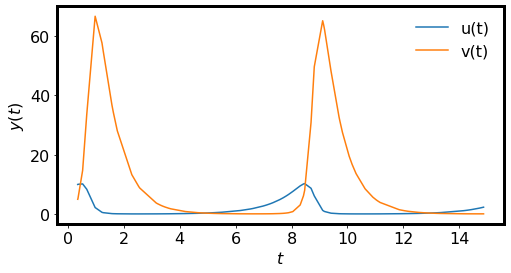

In [ ]:
N = 1000.0
alpha = 1.0   # incubation period of three days
beta = 0.1  # infected person infects 1 other person per day
gamma = 1.5 # infections lasts four days
delta=0.75
sigma_n = 0.1

# Initial conditions: one infected, rest susceptible
u_init,v_init=10.0,5.0
x_init = np.array([u_init,v_init])

# We will simulate over 100 days considering daily average values
key = random.PRNGKey(0)
t = np.sort(15.0*random.uniform(key, (100, )))

# Generate noisy time-series data
X_true = odeint(model, x_init, t, alpha, beta, gamma, delta)
X = X_true

# Plot the reference trajectories
plt.figure(figsize = (8,4))
plt.plot(t, X[:,0], '-', label='u(t)')
plt.plot(t, X[:,1], '-', label='v(t)')
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

Text(0, 0.5, '$y(t)$')

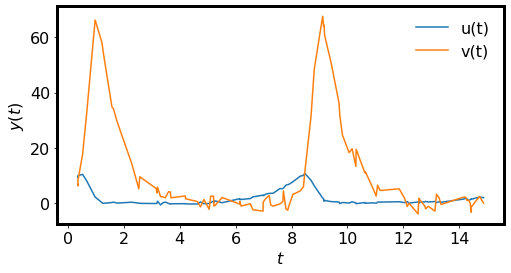

In [ ]:
X = X_true + sigma_n*X_true.std(0)*random.normal(key, X_true.shape)

# Plot the reference trajectories
plt.figure(figsize = (8,4))
plt.plot(t, X[:,0], '-', label='u(t)')
plt.plot(t, X[:,1], '-', label='v(t)')
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

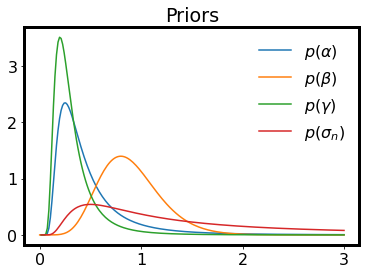

In [ ]:
from jax.lax import lgamma

# https://en.wikipedia.org/wiki/Normal_distribution
def norm_logpdf(x, loc=0.0, scale=1.0):
    return -np.log(scale) - 0.5*np.log(2.0*np.pi)-0.5*(x-loc)**2/scale**2

# https://en.wikipedia.org/wiki/Gamma_distribution
def gamma_logpdf(x, shape=0.0, scale=1.0):
    return (shape-1.0)*np.log(x) - x/scale - lgamma(shape) - shape*np.log(scale)

# https://en.wikipedia.org/wiki/Inverse-gamma_distribution
def invgamma_logpdf(x, shape=0.0, scale=1.0):
    return shape*np.log(scale) - (shape+1.0)*np.log(x) - scale/x - lgamma(shape)

# Plot priors
xx = np.linspace(0, 3, 200)
plt.plot(xx, np.exp(invgamma_logpdf(xx, 3.0, 1.0)), label=r'$p(\alpha)$')
plt.plot(xx, np.exp(gamma_logpdf(xx, 9.0, 0.1)), label=r'$p(\beta)$')
plt.plot(xx, np.exp(invgamma_logpdf(xx, 4.0, 1.0)), label=r'$p(\gamma)$')
plt.plot(xx, np.exp(invgamma_logpdf(xx, 1.0, 1.0)), label=r'$p(\sigma_n)$')
plt.title('Priors')
plt.legend(frameon=False)

In [ ]:
def log_posterior(params, batch):
    alpha, beta, gamma,delta, sigma_n = params
    inputs, targets = batch
    x0, t = inputs
    # Log-likelihood
    outputs = odeint(model, x0, t, alpha, beta, gamma,delta)
    log_likelihood = np.sum(norm_logpdf(targets, loc=outputs, scale=sigma_n))
    # Log-prior
    log_prior = gamma_logpdf(alpha, shape=9.0, scale=0.1) + \
                gamma_logpdf(beta, shape=2.0, scale=0.05) + \
                gamma_logpdf(gamma, shape=2.0, scale=1.0) + \
                gamma_logpdf(delta, shape=1.0, scale=1.0) + \
                invgamma_logpdf(sigma_n, shape=1.0, scale=2.0)
    return log_likelihood + log_prior

In [ ]:
from jax import jit, vmap
from jax.lax import scan, cond
from functools import partial

def metropolis(log_prob, sigma):
    def init(rng_key, bounds):
        lb, ub = bounds
        dim = lb.shape[0]
        x0 = random.uniform(rng_key, (dim,), minval=lb, maxval=ub)
        return x0
    @partial(jit, static_argnums=(0,))
    def sample(num_samples, rng_key, init_state):
        def kernel(carry, i):
            key, state, logp = carry
            key, subkey = random.split(key)
            x = state + sigma * random.normal(subkey, state.shape)
            logp_prop = log_prob(x)
            u = random.uniform(key)
            cond = (u < np.exp(logp_prop - logp))
            state = np.where(cond, x, state)
            logp = np.where(cond, logp_prop, logp)
            return (key, state, logp), state
        logp = log_prob(init_state)
        _, samples = scan(kernel, (rng_key, init_state, logp), np.arange(num_samples))
        return samples
    return init, sample

In [ ]:
inputs = x_init, t
targets = X
batch = inputs, targets

log_prob = lambda params: log_posterior(params, batch)

step_size = 0.005
init_fn, sample_fn = metropolis(log_prob, step_size)

num_chains = 2
burn_in = 5000
num_steps = 1000000
key = random.PRNGKey(0)
keys = random.split(key, num_chains)
init_states = np.array([[3.0, 0.8, 0.3, 0.5,0.1], [2.0, 1.1, 0.5, 0.3,0.5]])
samples = vmap(sample_fn, in_axes=(None, 0, 0))(num_steps, keys, init_states)

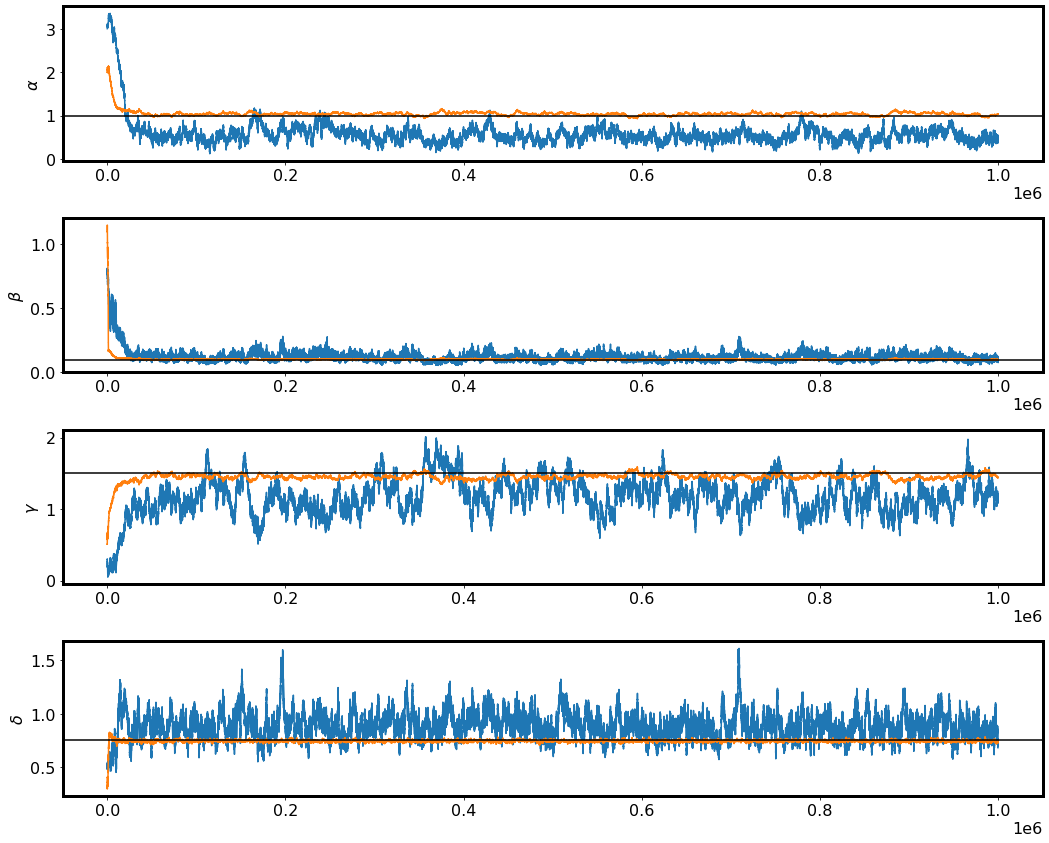

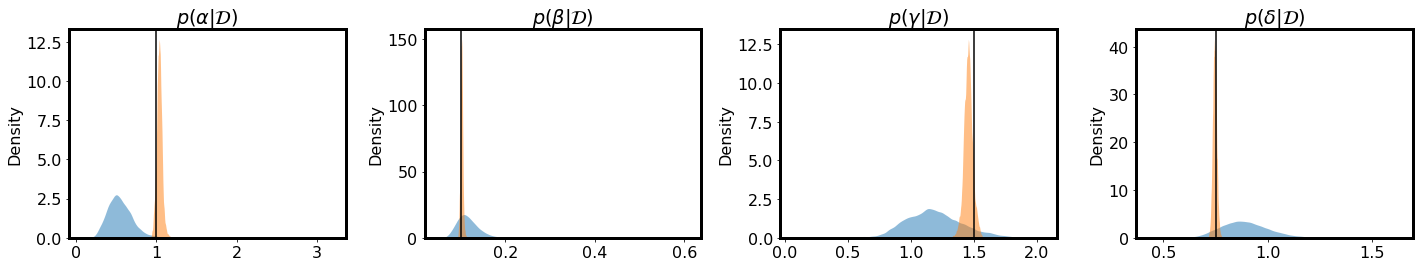

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
for i in range(num_chains):
    plt.plot(samples[i,:,0])
plt.axhline(alpha, color='black')
plt.ylabel(r'$\alpha$')
plt.subplot(4,1,2)
for i in range(num_chains):
    plt.plot(samples[i,:,1])
plt.axhline(beta, color='black')
plt.ylabel(r'$\beta$')
plt.subplot(4,1,3)
for i in range(num_chains):
    plt.plot(samples[i,:,2])
plt.axhline(gamma, color='black')
plt.ylabel(r'$\gamma$')
plt.tight_layout()
plt.subplot(4,1,4)
for i in range(num_chains):
    plt.plot(samples[i,:,3])
plt.axhline(delta, color='black')
plt.ylabel(r'$\delta$')
plt.tight_layout()

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
for i in range(num_chains):
    sns.kdeplot(samples[i,burn_in:,0], fill=True, alpha=.5, linewidth=0)
plt.axvline(alpha, color='k')
plt.title(r'$p(\alpha|\mathcal{D})$')
plt.subplot(1,4,2)
for i in range(num_chains):
    sns.kdeplot(samples[i,burn_in:,1], fill=True, alpha=.5, linewidth=0)
plt.axvline(beta, color='k')
plt.title(r'$p(\beta|\mathcal{D})$')
plt.subplot(1,4,3)
for i in range(num_chains):
    sns.kdeplot(samples[i,burn_in:,2], fill=True, alpha=.5, linewidth=0)
plt.axvline(gamma, color='k')
plt.title(r'$p(\gamma|\mathcal{D})$')
plt.subplot(1,4,4)
for i in range(num_chains):
    sns.kdeplot(samples[i,burn_in:,3], fill=True, alpha=.5, linewidth=0)
plt.axvline(delta, color='k')
plt.title(r'$p(\delta|\mathcal{D})$')
plt.tight_layout()

In [ ]:
from jax import vmap

@jit
def predictive_posterior(samples, batch):
    inputs, _ = batch
    x0, t = inputs
    outputs = odeint(model, x0, t, samples[0], samples[1], samples[2], samples[3])
    return outputs

num_traj = 50
chain_1 = samples[0,...]
chain_2 = samples[1,...]
traj_1 = vmap(predictive_posterior, in_axes=(0,None))(chain_1[-num_traj:,:], batch)
traj_2 = vmap(predictive_posterior, in_axes=(0,None))(chain_2[-num_traj:,:], batch)

Text(0, 0.5, '$y(t)$')

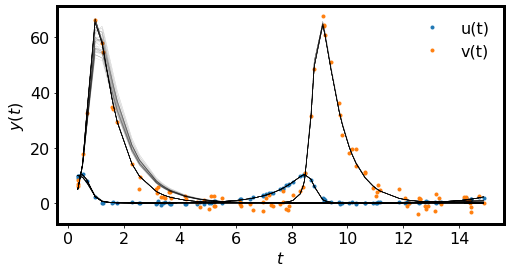

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(t, X[:,0], '.', label='u(t)')
plt.plot(t, X[:,1], '.', label='v(t)')

for i in range(num_traj):
    plt.plot(t, traj_1[i-num_traj,:],'k', lw=0.5, alpha=0.1)
    plt.plot(t, traj_2[i-num_traj,:],'k', lw=0.5, alpha=0.1)
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')